In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# Variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [9]:
import pandas as pd

# Column names based on the provided information
column_names = [
    "ID", "Diagnosis",
    "Radius_Mean", "Texture_Mean", "Perimeter_Mean", "Area_Mean", "Smoothness_Mean",
    "Compactness_Mean", "Concavity_Mean", "Concave_Points_Mean", "Symmetry_Mean", "Fractal_Dimension_Mean",
    "Radius_SE", "Texture_SE", "Perimeter_SE", "Area_SE", "Smoothness_SE",
    "Compactness_SE", "Concavity_SE", "Concave_Points_SE", "Symmetry_SE", "Fractal_Dimension_SE",
    "Radius_Worst", "Texture_Worst", "Perimeter_Worst", "Area_Worst", "Smoothness_Worst",
    "Compactness_Worst", "Concavity_Worst", "Concave_Points_Worst", "Symmetry_Worst", "Fractal_Dimension_Worst"
]

# Read the data from the .data file using the column names
df = pd.read_csv('wdbc.data', names=column_names)

# Write the DataFrame to a new CSV file
df.to_csv('data.csv', index=False)

# Confirm that the file has been created
print("New CSV file 'data.csv' has been created.")


New CSV file 'data.csv' has been created.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows to understand the structure
print(df.head())


         ID Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_Worst  Texture_Worst  Perimeter_Worst  Area_Wor

In [11]:
# If the correct column name is 'Diagnosis' instead of 'diagnosis'
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Then separate features and target variable using the correct column name
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


In [12]:
from sklearn.model_selection import train_test_split

# Ensure that X and y are defined appropriately before running this code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=10000)

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming model has been initialized and trained previously

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6228070175438597
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


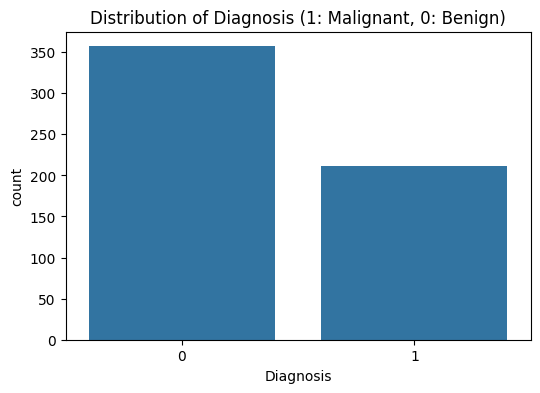

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Diagnosis (1: Malignant, 0: Benign)')
plt.show()
